# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

D:\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing the dataset

In [2]:
# dataset = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_sine_sweep9_voltage.csv')
# dataset2= pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/sine_sweep9.csv')
# X = dataset.iloc[:, 0:4].values
# y = dataset2.iloc[:, 0].values
# #length_x = dataset2.iloc[:, 0].values
# #lengt=dataset1.iloc[:, -1].values
# X.shape

In [3]:
dataset1_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test1_voltage.csv')
dataset1_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test2_voltage.csv')
dataset1_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_trap_uniform_test3_voltage.csv')
dataset2_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test1.csv')
dataset2_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test2.csv')
dataset2_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/trap_uniform_test3.csv')

X = np.vstack((dataset1_1,dataset1_2,dataset1_3))
y = np.vstack((dataset2_1,dataset2_2,dataset2_3))
y = y[:, 1]
#X = dataset.iloc[:, 0:4].values
#y = dataset2.iloc[:, 1].values
#length_x = dataset2.iloc[:, 0].values
#lengt=dataset1.iloc[:, -1].values
X.shape

(52012, 4)

In [4]:
X.shape

(52012, 4)

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, shuffle = True)

In [6]:
# dimensionality reduction

# from sklearn.decomposition import PCA
# pca = PCA(n_components = 3)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

## Training the Multiple Linear Regression model on the Training set

In [7]:
from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
regressor = Ridge(alpha=0.001)
regressor.fit(X_train, y_train)
scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_percentage_error', cv = 2)
#avg_cross_val_score = np.mean(scores)*100
#regressor = linear_model.Lasso(alpha=0.1,max_iter=1000,positive=True)
print(np.abs(scores.mean()))

0.08262719695424497


In [8]:
print(regressor.coef_)
# array([0.2, 0.5])

print(regressor.intercept_)
# 0.099

[-109.21230958  359.38904567   11.09432941  -47.36943977]
-0.9883740781814172


## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Evaluating the Model Performance

In [10]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)
# print((r2_score(y_test, y_pred))*100)
# MSE2 = np.square(np.subtract(y_test,y_pred)).mean() 
# RMSE = math.sqrt(MSE2)
# print("Mean Square Error:\n")
# print(MSE2)

# NMSE2 = (math.sqrt(MSE2))/len(y_test)
# print("Normalized Mean Square Error:\n")
# print(NMSE2)

In [11]:
#plt.plot(y_test)
#plt.plot(y_pred)
#plt.xlim(len(y_pred)-200,len(y_pred))
#plt.ylim(400,500)

In [12]:
y_pred2 = regressor.predict(X)

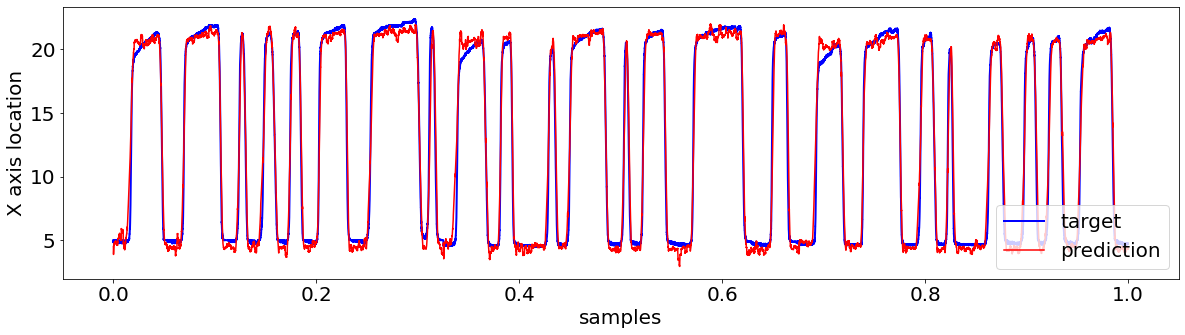

In [13]:
plt.rcParams.update({'font.size': 20})
x1=np.linspace(0, 1.0, num=len(y_pred2))
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(x1,y,'-b',linewidth=2)
plt.plot(x1,y_pred2,'-r')
#plt.ylim(-15,45)
#plt.ylim(45,95)
#plt.xlim(0.8,1.0)
plt.xlabel('samples')
#plt.ylabel('Y axis deformation')
plt.ylabel('X axis location')
plt.legend(['target','prediction'],loc ="lower right")

In [14]:
from scipy.io import savemat
#savemat('sine_volt.mat', {'sine_volt': X})
savemat('Ridge_sine_x.mat', {'Ridge_sine_x': np.transpose(y)})
savemat('Ridge_sine_xpred.mat', {'Ridge_sine_xpred': np.transpose(y_pred2)})

In [15]:
#df = pd.DataFrame({"true" : y, "prediction" : y_pred2, "error" : normDiffTestAvg})
#df.to_csv("Data_SMA/Ridge_SMA_x.csv", index=False)

In [16]:
from sklearn.metrics import make_scorer
def mean_abs_error(y_true, y_predict):
  return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true)).mean()
  #return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true))
mean_abs_scorer = make_scorer(mean_abs_error, greater_is_better=False)

In [17]:
#from sklearn.metrics import mean_absolute_percentage_error
error=np.abs(np.transpose(y_test)-np.transpose(y_pred))
error=mean_abs_error(np.transpose(y_test), np.transpose(y_pred))
#scikit_abs_mean_percent=mean_absolute_percentage_error(y_test, y_pred)
print('user defined=', error)
#print('scikit learn defined=', scikit_abs_mean_percent)

user defined= 0.08191720740165351
